In [1]:
from hdfs import InsecureClient

ModuleNotFoundError: No module named 'hdfs'

In [2]:
# fs = InsecureClient('namenode:9870', user='hadoop')
fs = InsecureClient('http://bdata.iptime.org:9999', user='hadoop')

In [3]:
import pandas as pd
import numpy as np

In [4]:
for f in fs.list('/user/hadoop/sports'):
    if f[f.rindex('.')+1:] == 'csv': print(f)
    # print(f[:f.rindex('.')], '--', f[f.index('.')+1:])

대한민국_1인당_개인소득_2015_2023.csv
지역별_스포츠_동호회_현황.csv
규칙적_체육활동_참여율_주_1회_이상__연도별_비교_20250114092534.csv
규칙적_체육활동_참여_여부_및_빈도_20250110135843.csv
부산광역시주민등록인구통계_20231231.csv
생활체육관련_강좌_및_강습_경험_종목_대분류_복수응답_20250109115503.csv
스포츠산업_산업분류별_매출액_20250107111645.csv
연령별인구현황_연간_2008-2023.csv
예술_스포츠_및_여가관련_서비스업_시도_산업_이용인원_수_현황_20250107110224.csv
인구_십만명당_체육시설수_시도__20250109115945.csv
장래인구_20250110135238.csv
행정구역_시군구_별__성별_인구수_20250116103145.csv
1인당_국내총생산_2015년_기준년가격__20250110124212.csv
9.8.15_폐업자_현황_Ⅵ__지역__업태_2015_20250110122237.csv
9.8.21_신규사업자_현황_Ⅴ_지역__업태_2015_20250110122108.csv
_20250110104927.csv
gdp.csv


In [5]:
import sys
sys.path.append('/home/jovyan/data/module/')

from api import getOpenAPIFull
url = 'http://apis.data.go.kr/B551014/SRVC_API_SFMS_FACI/TODZ_API_SFMS_FACI?'
res_type = 'json'
res = getOpenAPIFull(url, res_type)
res = res['body']['items']['item']
print(res[:10])

[{'addr_ctpv_nm': '경기도', 'nation_yn': 'N', 'faci_daddr': '1005호', 'row_num': 1, 'base_ymd': '20210310', 'faci_stat_nm': '정상운영', 'faci_mng_type_cd': '자체운영        ', 'reg_dt': '2021-08-11', 'fmng_cpb_nm': '고양시', 'inout_gbn_nm': '없음', 'faci_lat': '37.6361379021603', 'faci_cd': 'E1DE682A80811DA7E71A53B2F1D45637', 'faci_zip': '10497', 'faci_gfa': 88, 'fmng_cp_nm': '경기도', 'ftype_nm': '무도학원', 'cpb_nm': '고양시', 'addr_emd_nm': '화정동', 'addr_cpb_nm': '고양시 덕양구', 'faci_road_zip': '10497', 'faci_lot': '126.831467372597', 'updt_dt': '2024-12-18', 'faci_gb_nm': '신고', 'cp_nm': '경기도', 'faci_nm': '위드미 댄스', 'faci_road_addr': '경기도 고양시 덕양구 화중로 100(화정동)', 'atnm_chk_yn': 'N', 'fcob_nm': '무도학원업', 'faci_addr': '경기도 고양시 덕양구 화정동 968 비젼타워21'}, {'addr_ctpv_nm': '경기도', 'nation_yn': 'N', 'row_num': 2, 'base_ymd': '20210309', 'faci_stat_nm': '정상운영', 'reg_dt': '2021-08-11', 'inout_gbn_nm': '없음', 'faci_lat': '37.661864579188', 'faci_cd': '97E7959ABA7ED5F870AF36079FC6E98F', 'faci_zip': '10571', 'faci_gfa': 248, 'ftype_nm'

In [6]:
_data = res.copy()
_list = []
ks = list(_data[0].keys())
    
l = max([len(d) for d in _data])
for d in _data:
    if len(d) == l:
        ks = list(d.keys())
        break


for d in _data:
    _items = []
    # print(list(d.keys())[:8])
    # if ks.find('faci_daddr'):
    #     ks.insert(2, 'faci_daddr')
    for k in ks:
        _items.append(d.get(k, np.nan))
    # _list.append([d['addr_ctpv_nm'], d['ftype_nm']])
    _list.append(_items)

print(_list[-10:])

[['서울특별시', nan, 'N', nan, '서흥빌딩 지하1층 (서초동)', 142371, '20230905', nan, '정상운영', nan, nan, '2024-07-29', nan, '없음', nan, '37.4952764993945', 'F9349AEDFF3CAEF494368E8655F7002B', '06607', 0, '서흥빌딩 지하1층 (서초동)', nan, '축구', '서초구', '서초동', nan, '서초구', '06607', nan, '127.01808528391', '2024-10-31', '신고', '서울특별시', nan, 'Sharp Football Academy(샤프 풋볼 아카데미)', '서울특별시 서초구 서초대로 335 (서초동)', nan, 'Y', '체육교습업', '서울특별시 서초구 서초동 1689-2 서흥빌딩', nan, nan], ['충청북도', nan, 'N', nan, '덕산면 근린공원 ', 142372, nan, nan, '정상운영', '자체운영        ', '지자체', '2024-07-29', '제천시', nan, nan, '36.9097700981517', 'BBD10C0B10A684A6C5F44956D7EE9246', nan, nan, '덕산면 근린공원 ', '충청북도', '간이운동장', '제천시', '도전리', nan, '제천시', nan, '043-641-6513', '128.166808036947', '2024-10-31', '공공', '충청북도', '043-641-5584', '덕산근린공원 ', nan, nan, 'N', '간이운동장', '충북 제천시 덕산면 도전리 367', nan, nan], ['서울특별시', nan, 'N', nan, '리라빌딩 지하1층 (양재동)', 142373, '20230905', nan, '정상운영', nan, nan, '2024-07-29', nan, '없음', nan, '37.4681493138338', '11F95863DD1B077231D30E9BE639A064', '

In [7]:
_columns = ks
df = pd.DataFrame(_list, columns=_columns)
df.tail()


,addr_ctpv_nm,stand_seat_cnt,nation_yn,faci_homepage,faci_daddr,row_num,base_ymd,fmng_dept_nm,faci_stat_nm,faci_mng_type_cd,...,cp_nm,faci_mng_user_telno,faci_nm,faci_road_addr,cp_ymd,atnm_chk_yn,fcob_nm,faci_addr,stand_cpt_psn_cnt,ssm_dsn_yn
142375,서울특별시,NaN,N,NaN,"지하1층 (방배동, 희연(HEE YEON))",142376,20220829,NaN,정상운영,NaN,...,서울특별시,NaN,윌 피티 짐,"서울특별시 서초구 서초대로25길 6 (방배동, 희연(HEE YEON))",NaN,Y,체력단련장업,서울특별시 서초구 방배동 876-20 희연(HEE YEON),NaN,NaN
142376,경상북도,NaN,N,NaN,NaN,142377,20240621,길안면,정상운영,자체운영,...,경상북도,054-840-4461,현하3경로당야외운동기구,경상북도 안동시 길안면 큰삽실길 22,20240621,N,간이운동장,경상북도 안동시 길안면 현하리 148-1 현하리마을회관,NaN,N
142377,서울특별시,NaN,N,NaN,지하1층 (반포동),142378,20220713,NaN,정상운영,NaN,...,서울특별시,NaN,(주)세영씨앤유 더레인지,서울특별시 서초구 강남대로 545-9 (반포동),NaN,Y,가상체험 체육시설업,서울특별시 서초구 반포동 707 더레인지 골프연습장,NaN,NaN
142378,서울특별시,NaN,N,NaN,NaN,142379,20220713,NaN,정상운영,NaN,...,서울특별시,NaN,(주)세영씨앤유 더레인지,서울특별시 서초구 강남대로 545-9 (반포동),NaN,Y,골프연습장업,서울특별시 서초구 반포동 707 더레인지 골프연습장,NaN,NaN
142379,서울특별시,NaN,N,NaN,"2층, 지하1층 (우면동)",142380,20220708,NaN,정상운영,NaN,...,서울특별시,NaN,와이지 골프 아카데미,서울특별시 서초구 성촌1길 6 (우면동),NaN,Y,가상체험 체육시설업,서울특별시 서초구 우면동 687-2,NaN,NaN


In [8]:
[df.columns, len(df.columns)]

[Index(['addr_ctpv_nm', 'stand_seat_cnt', 'nation_yn', 'faci_homepage',
        'faci_daddr', 'row_num', 'base_ymd', 'fmng_dept_nm', 'faci_stat_nm',
        'faci_mng_type_cd', 'fmng_type_gb_nm', 'reg_dt', 'fmng_cpb_nm',
        'inout_gbn_nm', 'use_asct_nm', 'faci_lat', 'faci_cd', 'faci_zip',
        'faci_gfa', 'faci_road_daddr', 'fmng_cp_nm', 'ftype_nm', 'cpb_nm',
        'addr_emd_nm', 'life_gym_nm', 'addr_cpb_nm', 'faci_road_zip',
        'faci_tel_no', 'faci_lot', 'updt_dt', 'faci_gb_nm', 'cp_nm',
        'faci_mng_user_telno', 'faci_nm', 'faci_road_addr', 'cp_ymd',
        'atnm_chk_yn', 'fcob_nm', 'faci_addr', 'stand_cpt_psn_cnt',
        'ssm_dsn_yn'],
       dtype='object'),
 41]

In [9]:
da = df.copy()[['cp_nm', 'faci_nm', 'ftype_nm']]
# print(type(da))

db = da.groupby('cp_nm')['faci_nm'].count().reset_index(name='count')
db = db.sort_values(by='count', ascending=False)
db

,cp_nm,count
1,경기도,32890
8,서울특별시,20324
3,경상북도,14470
2,경상남도,9804
12,전라남도,7981
7,부산광역시,7377
11,인천광역시,6852
0,강원특별자치도,6694
15,충청남도,5932
16,충청북도,5913


In [31]:
dc = da.groupby('ftype_nm')['faci_nm'].count().reset_index(name='count')
dc = dc.sort_values(by='count', ascending=False)
dc.head(10)

,ftype_nm,count
11,당구장,30128
0,간이운동장,29969
48,체력단련장,19858
53,태권도,15801
31,실내,7028
2,골프,6239
27,스크린,6217
7,권투,2679
8,기타시설,2586
44,전천후게이트볼장,2162


In [11]:
dn = df.copy()
dn = dn[['faci_addr', 'faci_road_addr', 'cp_nm']]
p = dn['faci_addr'].str.find(' ')
msk = p != -1
dn['cp_nm2'] = dn['cp_nm']
dn.loc[msk, 'cp_nm2'] = dn['faci_addr'].str.slice(0, dn.loc[msk, 'cp_nm2'])
dn['cp_nm2'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: cp_nm2, dtype: object

In [12]:
print(dn['faci_addr'].str.find(' ').head())

0    3.0
1    3.0
2    3.0
3    5.0
4    5.0
Name: faci_addr, dtype: float64


In [13]:
dn2 = df[df['faci_addr'].str[:2] == '부산'][df['faci_addr'].str.find('남구') >= 0][['faci_nm', 'cp_nm', 'faci_addr', 'fcob_nm']]

/tmp/ipykernel_14630/271637303.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dn2 = df[df['faci_addr'].str[:2] == '부산'][df['faci_addr'].str.find('남구') >= 0][['faci_nm', 'cp_nm', 'faci_addr', 'fcob_nm']]


In [14]:
dn2

,faci_nm,cp_nm,faci_addr,fcob_nm
762,댄스점핑다이어트,부산광역시,부산광역시 남구 대연동 1752-15,체력단련장업
809,요요당구장,부산광역시,부산광역시 남구 대연동 68-7,당구장업
819,분포문화체육센터 (체력단련장),부산광역시,부산광역시 남구 용호동 176-87 분포문화체육센터,체육관
1249,정무관 합기도,부산광역시,부산광역시 남구 대연동 1802-12,체육도장업
3947,브라더 스크린골프,부산광역시,부산광역시 남구 대연동 867-1,골프연습장업
...,...,...,...,...
142180,인더짐,부산광역시,부산광역시 남구 문현동 246-5,체력단련장업
142181,별하 태권도장,부산광역시,부산광역시 남구 대연동 1761-10 패밀리마트,체육도장업
142182,(주)워너짐 대연동지점,부산광역시,부산광역시 남구 대연동 63-3,체력단련장업
142313,홍법사 옆,부산광역시,부산광역시 남구 문현동 산102 홍법사,간이운동장


In [15]:
df['base_ymd']

0         20210310
1         20210309
2         20200929
3         20210326
4         20210223
            ...   
142375    20220829
142376    20240621
142377    20220713
142378    20220713
142379    20220708
Name: base_ymd, Length: 142380, dtype: object

In [23]:
dd = df.copy()
dd = dd[['base_ymd', 'cp_nm', 'faci_nm', 'ftype_nm']]
dd['base_ymd'] = pd.to_datetime(dd['base_ymd'].str[:4], format='%Y', errors='coerce')
dd = dd.groupby(['base_ymd', 'ftype_nm'], dropna=True)['faci_nm'].count().reset_index(name='count')
dd.sort_values(by=['base_ymd', 'count', 'ftype_nm'], ascending=[True, False, True], ignore_index=True, inplace=True)
dd.tail(40)

,base_ymd,ftype_nm,count
1370,2024-01-01,실외,21
1371,2024-01-01,배드민턴,15
1372,2024-01-01,검도,14
1373,2024-01-01,종합체육시설,14
1374,2024-01-01,스크린,13
1375,2024-01-01,레슬링,11
1376,2024-01-01,수영,11
1377,2024-01-01,롤러스케이트,9
1378,2024-01-01,무도학원,8
1379,2024-01-01,썰매장,8


In [30]:
dd['base_ymd'].drop_duplicates(ignore_index=True)

0    1900-01-01
1    1905-01-01
2    1936-01-01
3    1938-01-01
4    1948-01-01
        ...    
63   2021-01-01
64   2022-01-01
65   2023-01-01
66   2024-01-01
67   2025-01-01
Name: base_ymd, Length: 68, dtype: datetime64[ns]

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.style.use('default')

d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'

matplotlib.rcParams['axes.unicode_minus'] = False

Axes(0.125,0.798085;0.110714x0.0819149)
Axes(0.257857,0.798085;0.110714x0.0819149)
Axes(0.390714,0.798085;0.110714x0.0819149)
Axes(0.523571,0.798085;0.110714x0.0819149)
Axes(0.656429,0.798085;0.110714x0.0819149)
Axes(0.789286,0.798085;0.110714x0.0819149)
Axes(0.125,0.699787;0.110714x0.0819149)
Axes(0.257857,0.699787;0.110714x0.0819149)
Axes(0.390714,0.699787;0.110714x0.0819149)
Axes(0.523571,0.699787;0.110714x0.0819149)
Axes(0.656429,0.699787;0.110714x0.0819149)
Axes(0.789286,0.699787;0.110714x0.0819149)
Axes(0.125,0.601489;0.110714x0.0819149)
Axes(0.257857,0.601489;0.110714x0.0819149)
Axes(0.390714,0.601489;0.110714x0.0819149)
Axes(0.523571,0.601489;0.110714x0.0819149)
Axes(0.656429,0.601489;0.110714x0.0819149)
Axes(0.789286,0.601489;0.110714x0.0819149)
Axes(0.125,0.503191;0.110714x0.0819149)
Axes(0.257857,0.503191;0.110714x0.0819149)
Axes(0.390714,0.503191;0.110714x0.0819149)
Axes(0.523571,0.503191;0.110714x0.0819149)
Axes(0.656429,0.503191;0.110714x0.0819149)
Axes(0.789286,0.503191;

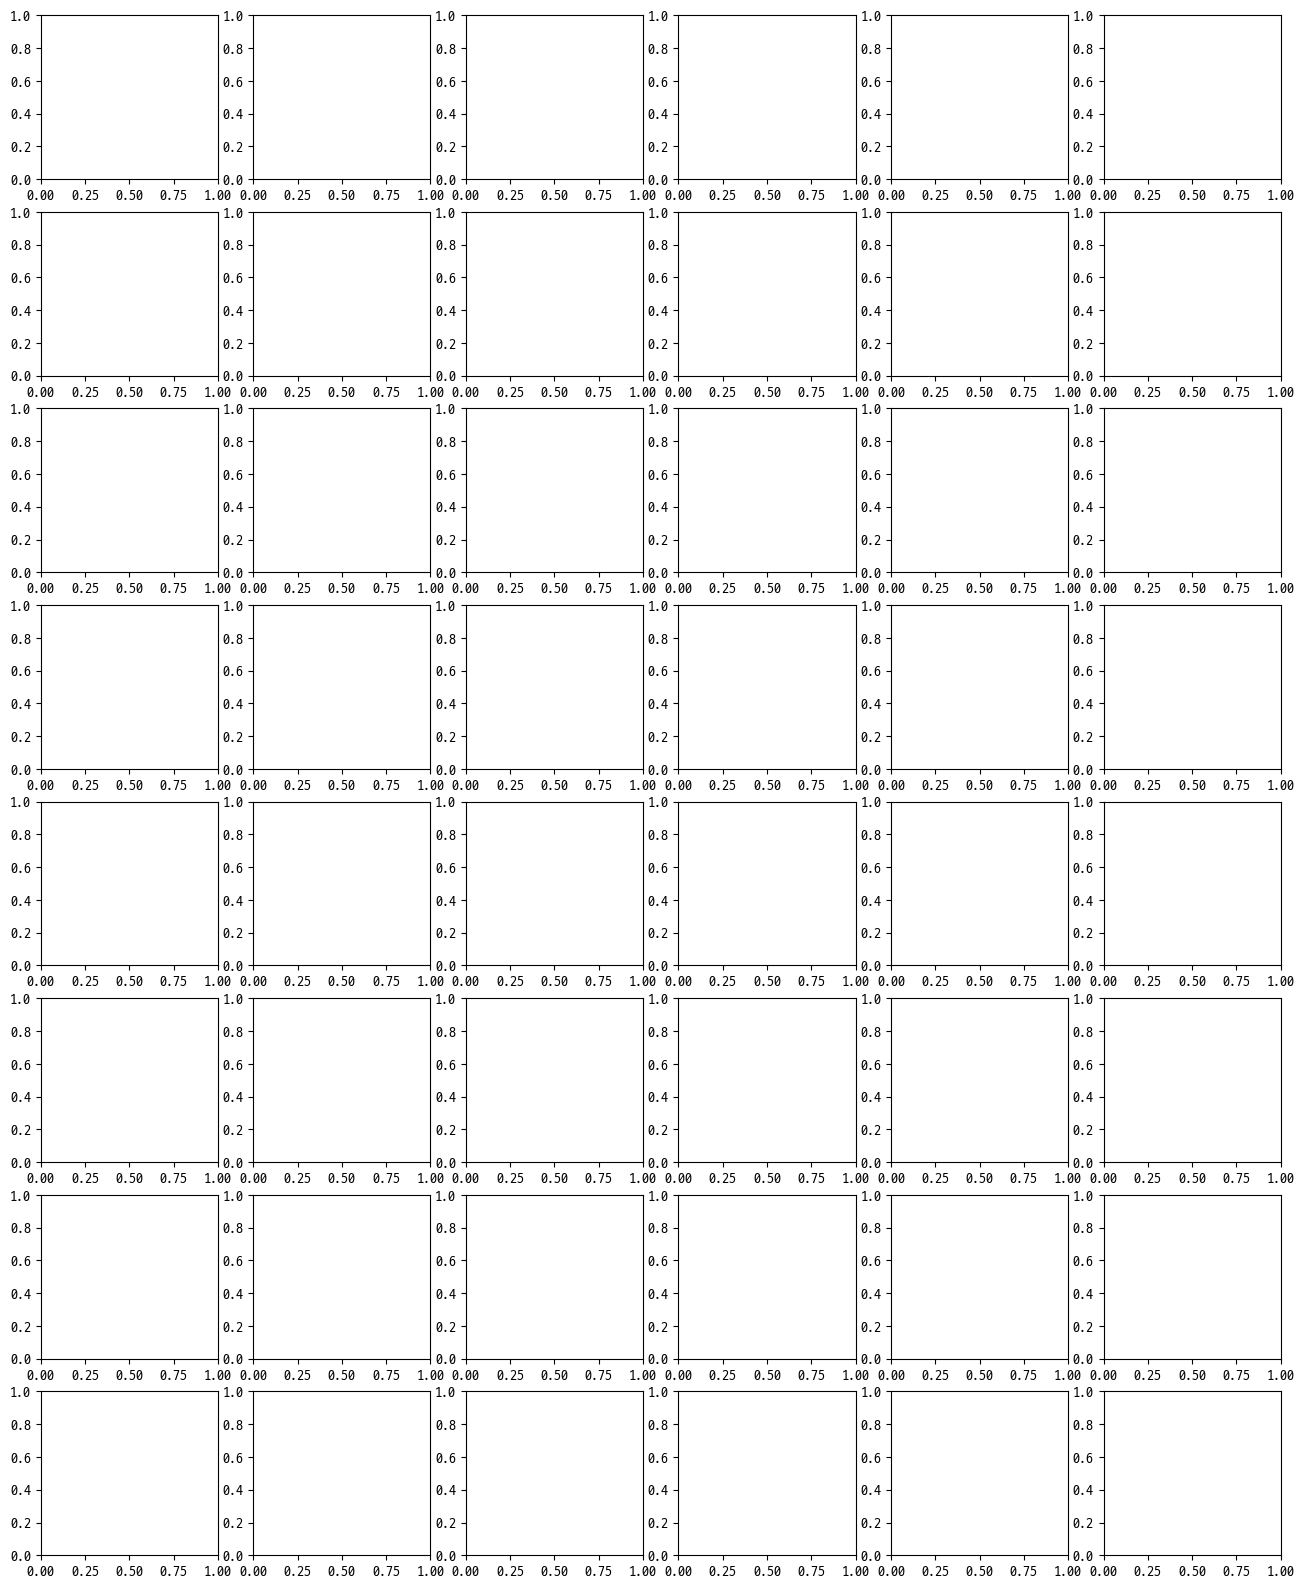

In [37]:
fig, axss = plt.subplots(8, 6, figsize=(16, 20))
for axs in axss:
    for ax in axs:
        print(ax)